In [5]:
## Waste Management using CNN Model

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path= "/Users/sujaljadhav/Desktop/WASTE CLASSIFICATION/DATASET/TRAIN"
test_path=  "/Users/sujaljadhav/Desktop/WASTE CLASSIFICATION/DATASET/TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [7]:
#Visualization 
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob (category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2246.72it/s]


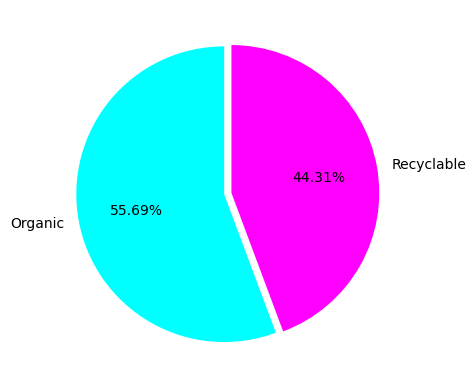

In [8]:
data.shape
colors =['#00FFFF','#FF00FF']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()

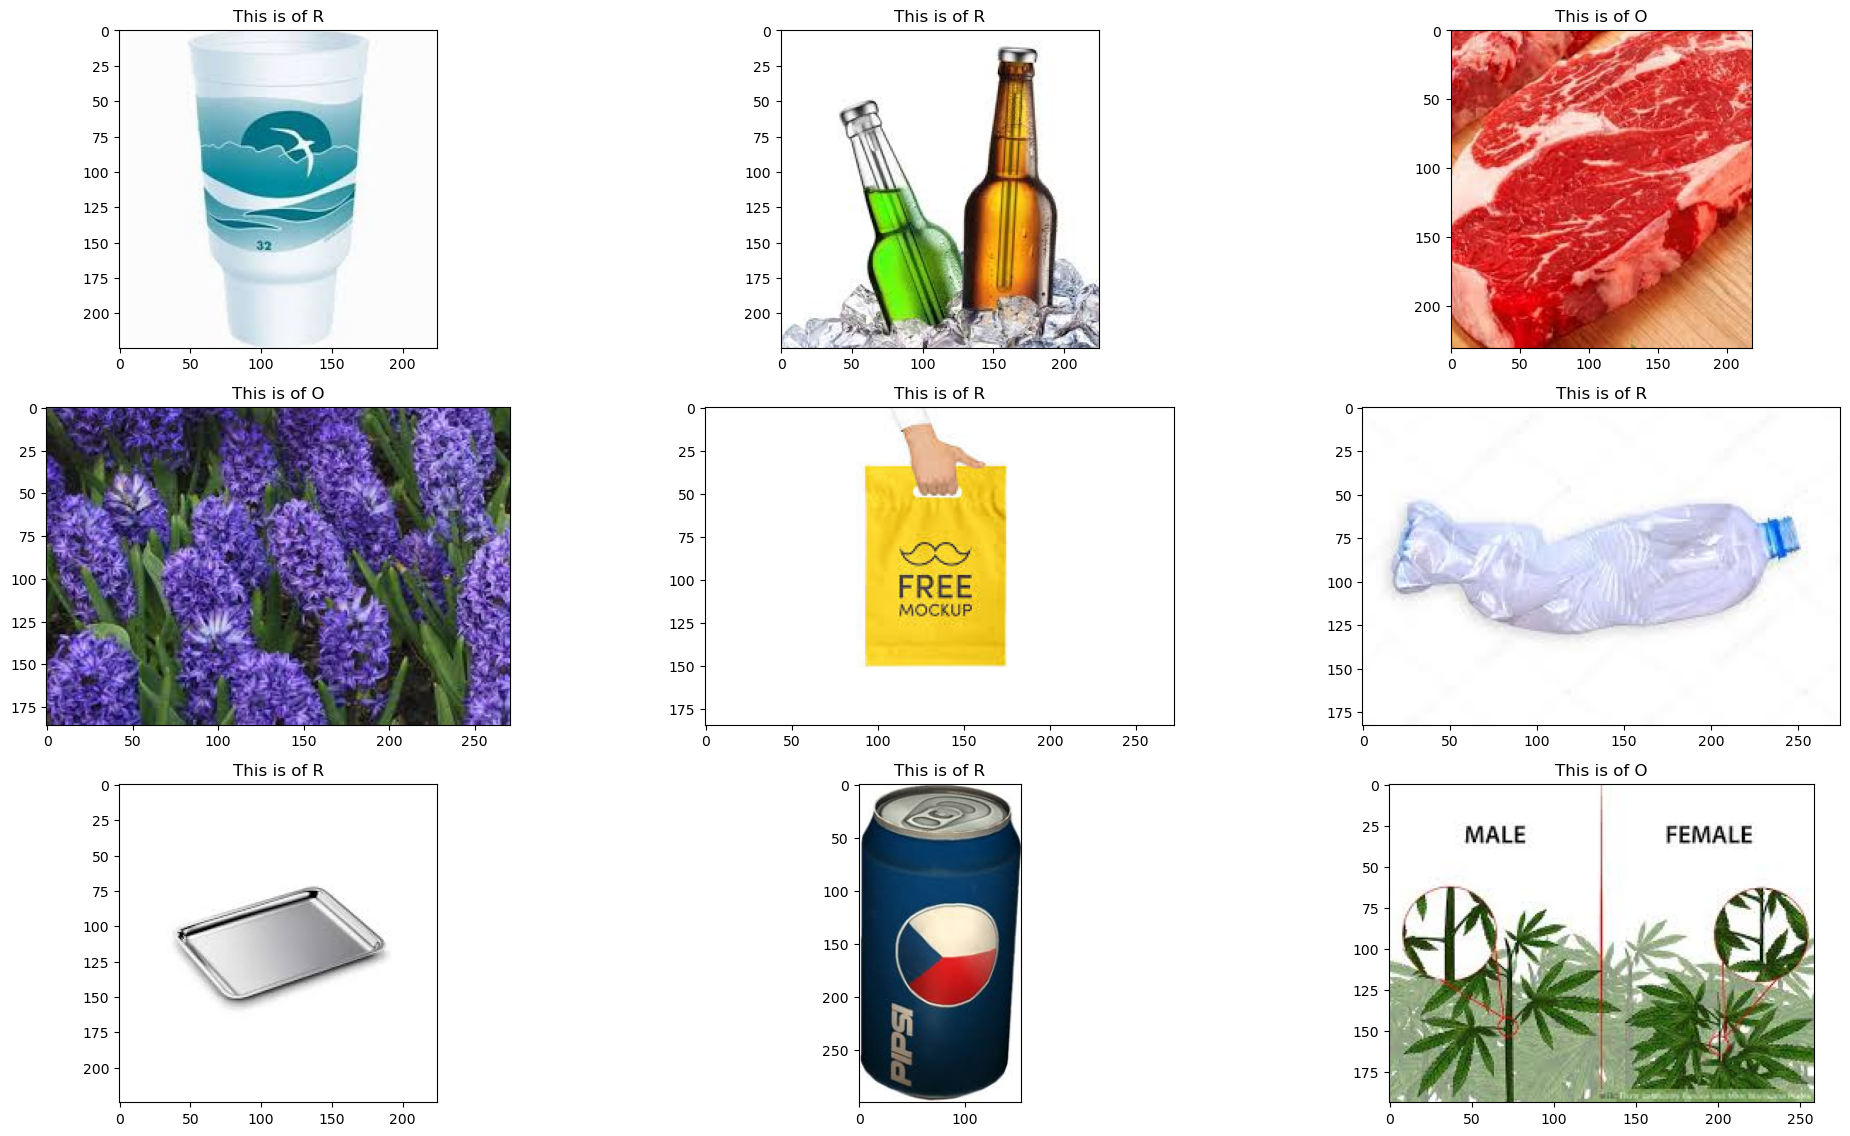

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)


Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.8385 - loss: 0.3916 - val_accuracy: 0.8965 - val_loss: 0.2872
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.8572 - loss: 0.3503 - val_accuracy: 0.8575 - val_loss: 0.3471
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.8767 - loss: 0.3116 - val_accuracy: 0.8973 - val_loss: 0.2786
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.8918 - loss: 0.2770 - val_accuracy: 0.9001 - val_loss: 0.2818
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.9145 - loss: 0.2241 - val_accuracy: 0.8814 - val_loss: 0.3482
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.9364 - loss: 0.1781 - val_accuracy: 0.8850 - val_loss: 0.3834
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step - accuracy: 0.9556 - loss: 0.1237 - val_accuracy: 0.8981 - val_loss: 0.3733
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.9654 - loss: 0.0997 - val_accu

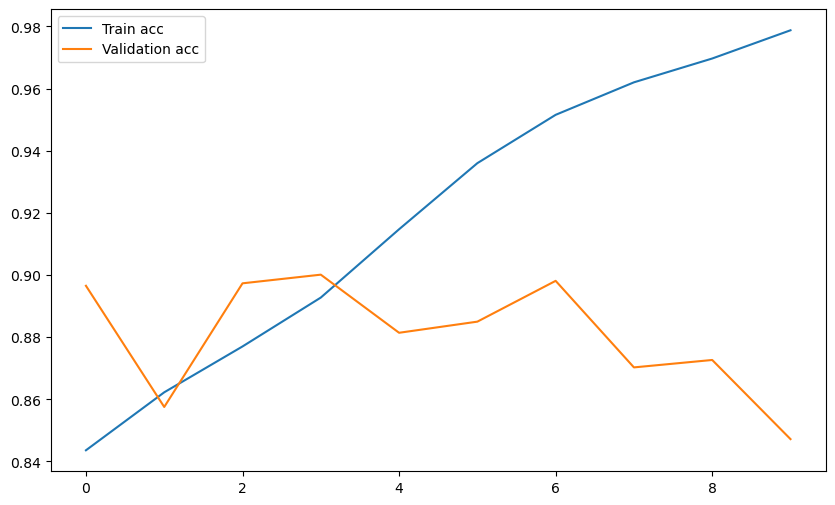

In [17]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

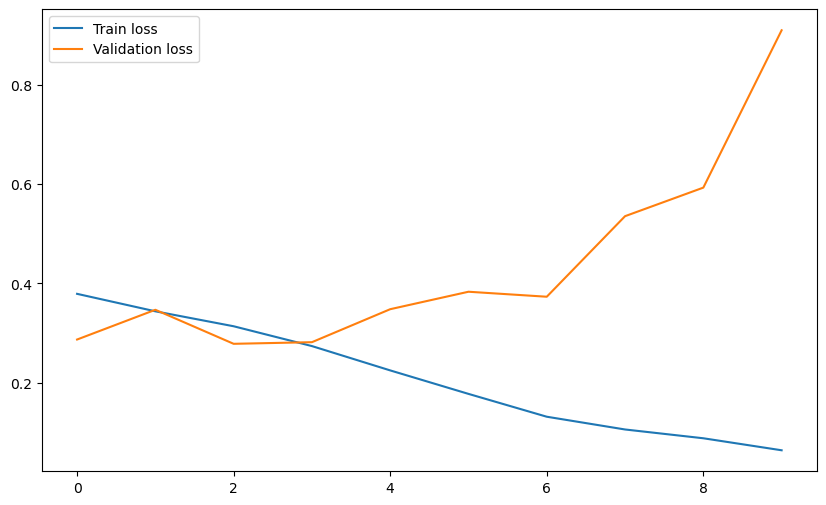

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [19]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
This image shows recyclable waste


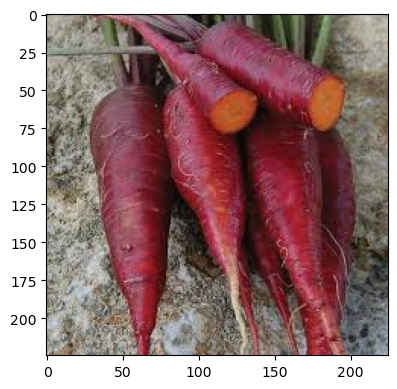

In [21]:
test_img = cv2.imread("/Users/sujaljadhav/Desktop/WASTE CLASSIFICATION/DATASET/TEST/O/O_12571.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This image shows organic waste


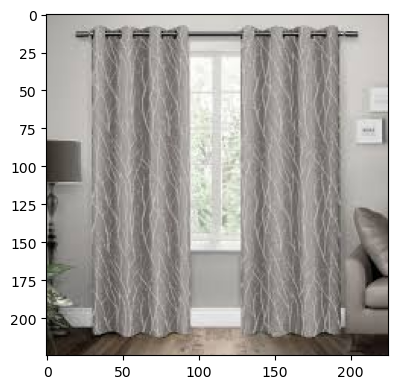

In [22]:
test_img = cv2.imread("/Users/sujaljadhav/Desktop/WASTE CLASSIFICATION/DATASET/TEST/R/R_10013.jpg")
predict_func(test_img)